# 80Cereal data prediction 

The main aim of the 80cereal data prediction is to gain insights into consumer preferences,improve products,make informed business decisions and ultimately enhance the overall success and competitiveness of cereal products in the market.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Data Collection

In [2]:
#loading the data set to a pandas dataframe
cereal_data=pd.read_csv(r'C:\Users\Lakshmi Pathy\Downloads\archive (2)\cereal.csv')

# Understanding the dataset

In [3]:
#number of rows and columns in dataset
cereal_data.shape

(77, 16)

In [4]:
#first five rows of dataset
cereal_data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [5]:
#checking for null vallues
cereal_data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

# Data Analysis & Visualization

In [6]:
#statistical measures of the dataset
cereal_data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


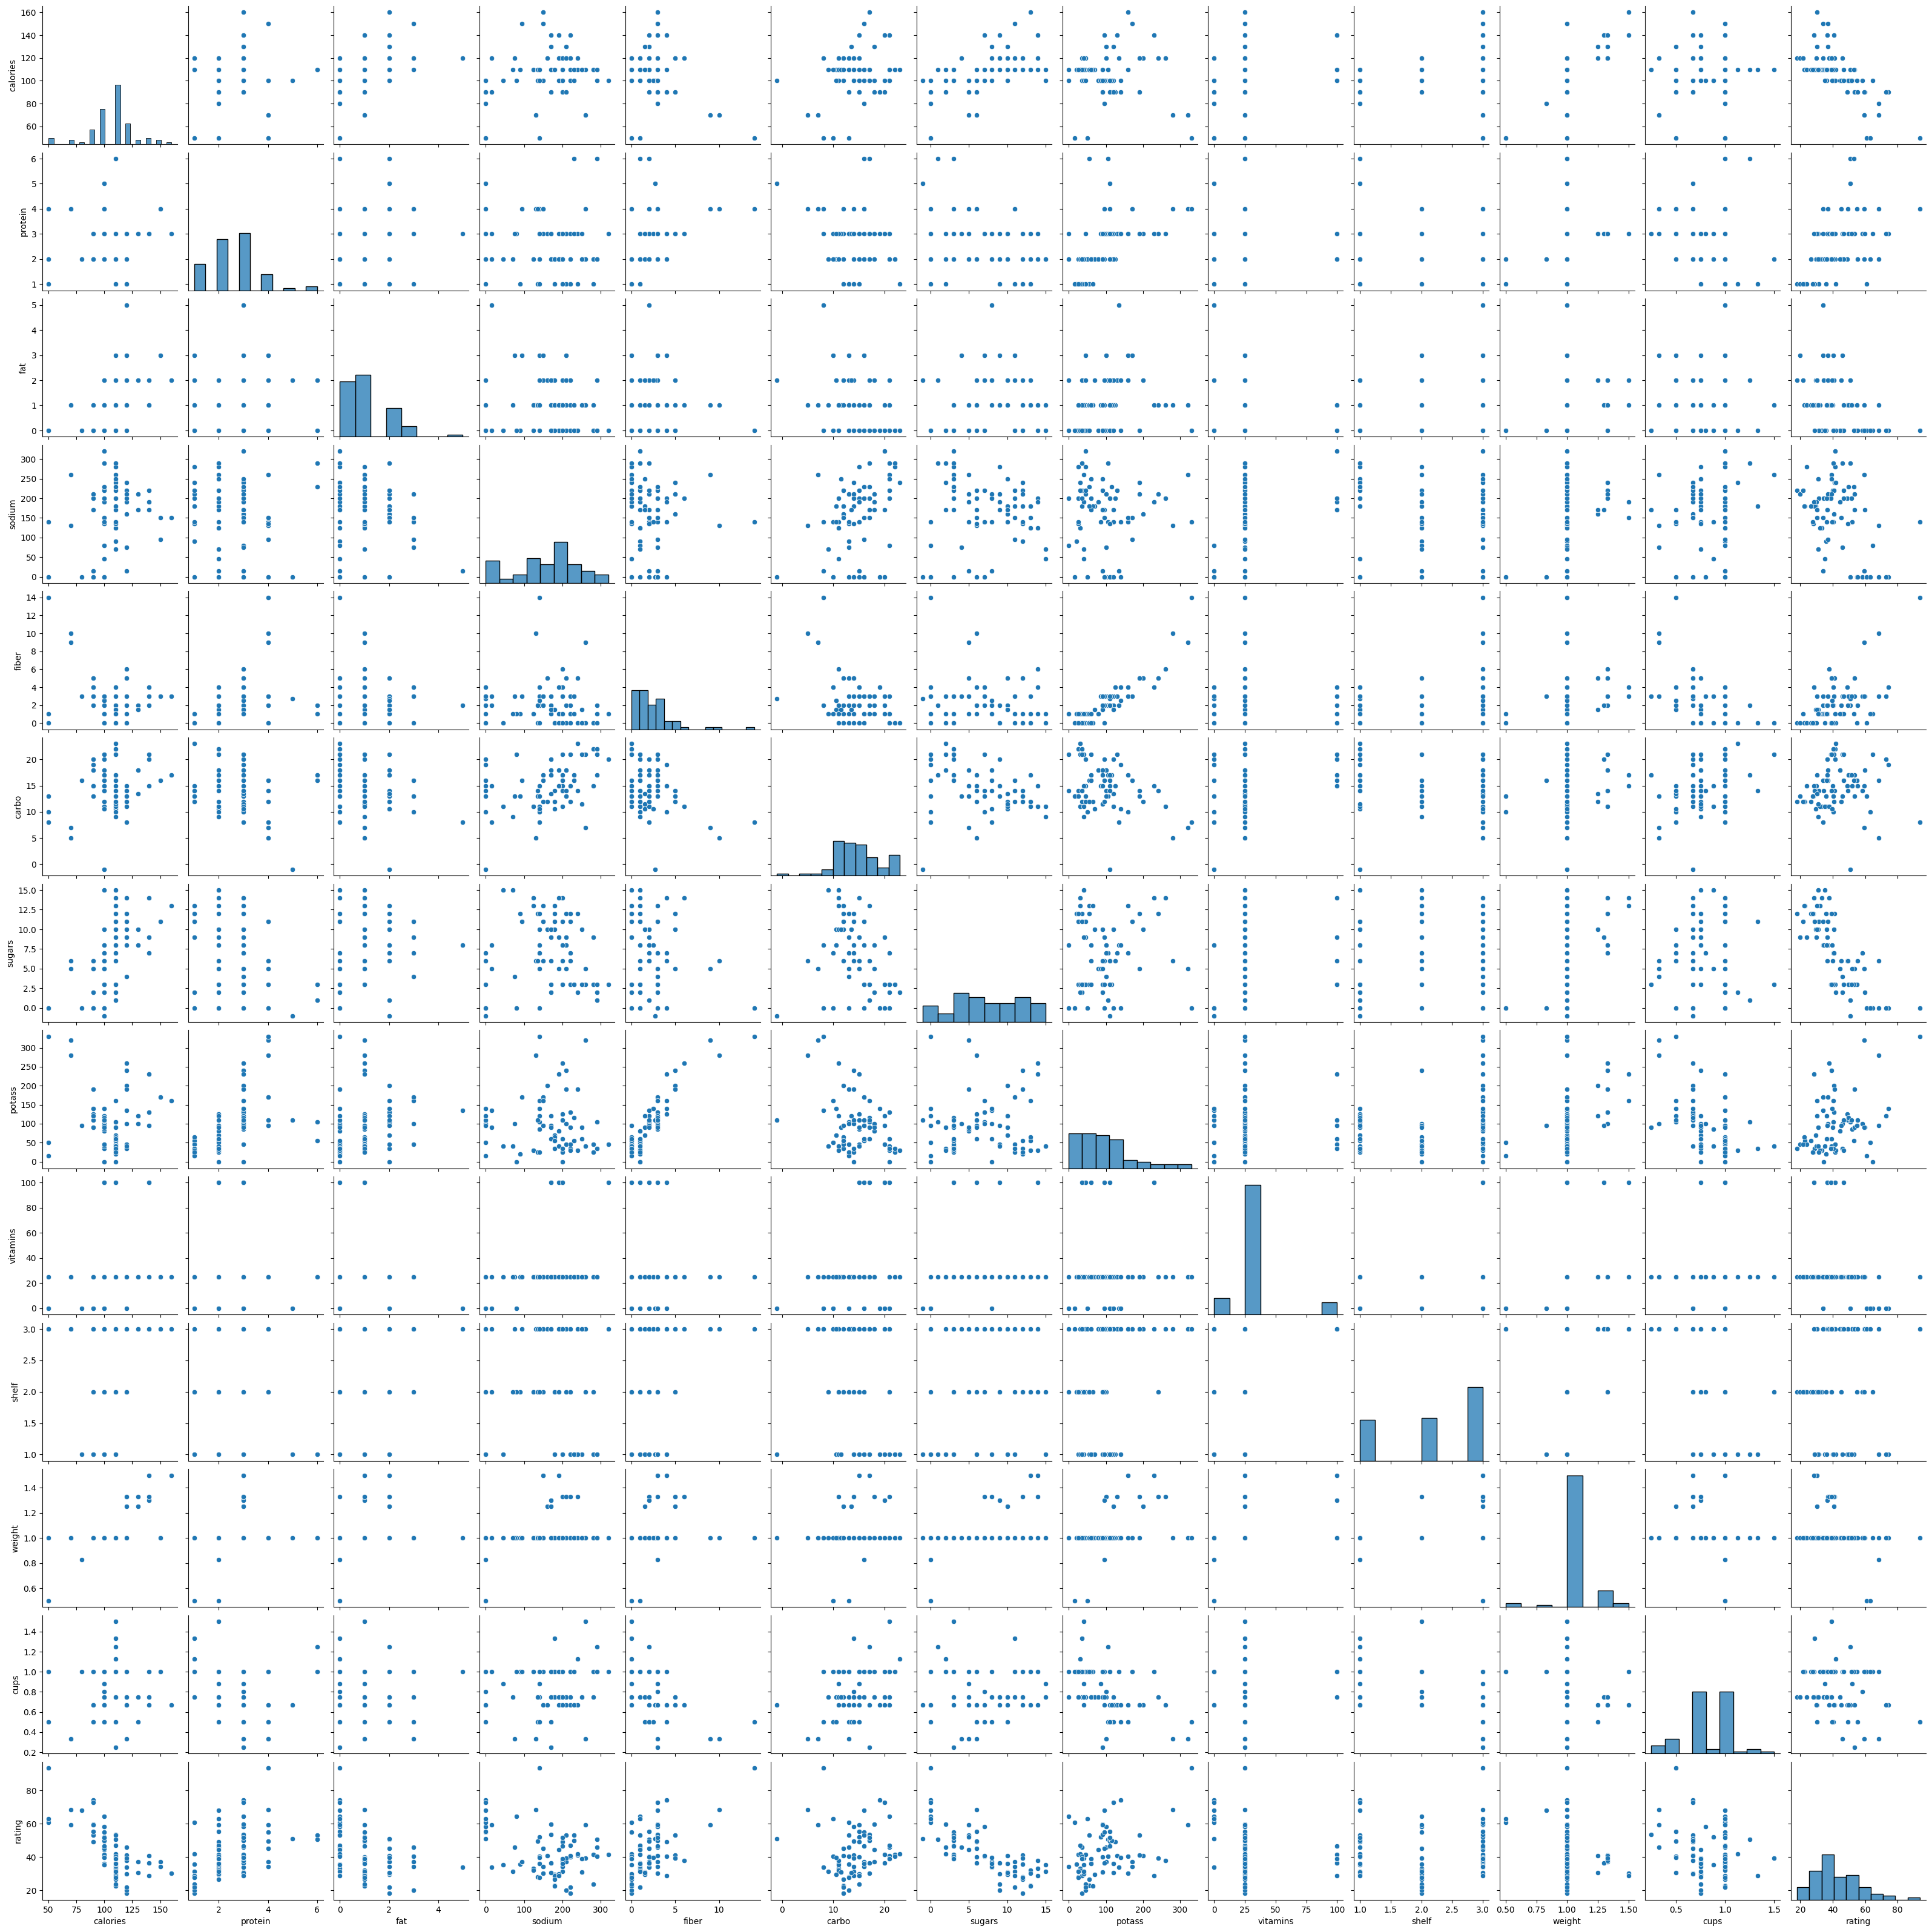

In [7]:
#number of values for each rating
sns.pairplot(cereal_data)

<Axes: xlabel='type', ylabel='calories'>

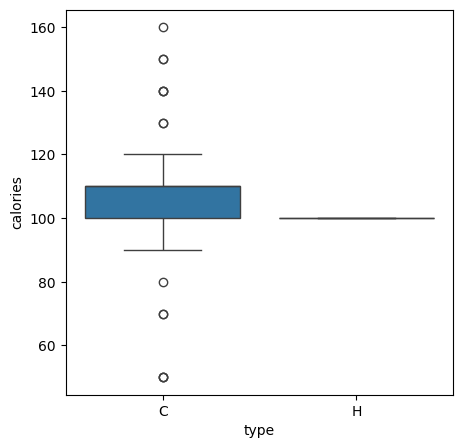

In [8]:
#type vs calories
plot=plt.figure(figsize=(5,5))
sns.boxplot(x="type",y="calories",data=cereal_data)

<Axes: xlabel='type', ylabel='calories'>

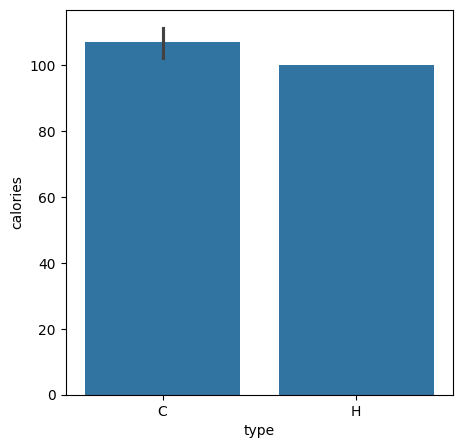

In [9]:
# type vs calories
plot=plt.figure(figsize=(5,5))
sns.barplot(x="type",y="calories",data=cereal_data)

<Axes: xlabel='fat', ylabel='sodium'>

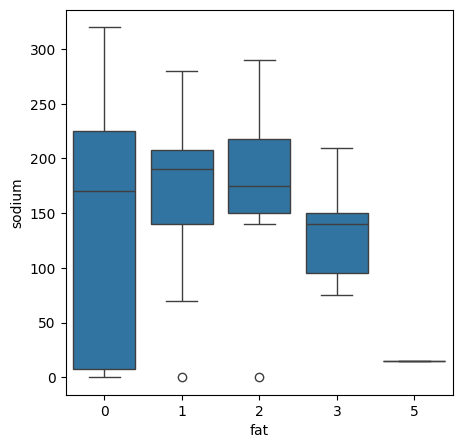

In [10]:
#fat vs sodium
plot=plt.figure(figsize=(5,5))
sns.boxplot(x="fat",y="sodium",data=cereal_data)

# Negative Values

In [11]:
(cereal_data==-1).sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [12]:
#replacing negative values to np.NAN
cereal_data=cereal_data.replace(-1, np.NAN)

In [13]:
cereal_data.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [14]:
#filtering NAN values with their columns mean value

for column in['carbo' , 'sugars' , 'potass']:
    cereal_data[column]=cereal_data[column].fillna(cereal_data[column].mean())

In [15]:
cereal_data.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [16]:
#Dropping the name column
cereal_data=cereal_data.drop(['name'],axis=1)

In [17]:
cereal_data.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,N,C,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,R,C,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843


In [18]:
#converting characters to numeric values by using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cereal_data["mfr"]=le.fit_transform(cereal_data["mfr"])
cereal_data["type"]=le.fit_transform(cereal_data["type"])

# Correlation

1.Positive
2.Negative

In [19]:
correlation=cereal_data.corr()

<Axes: >

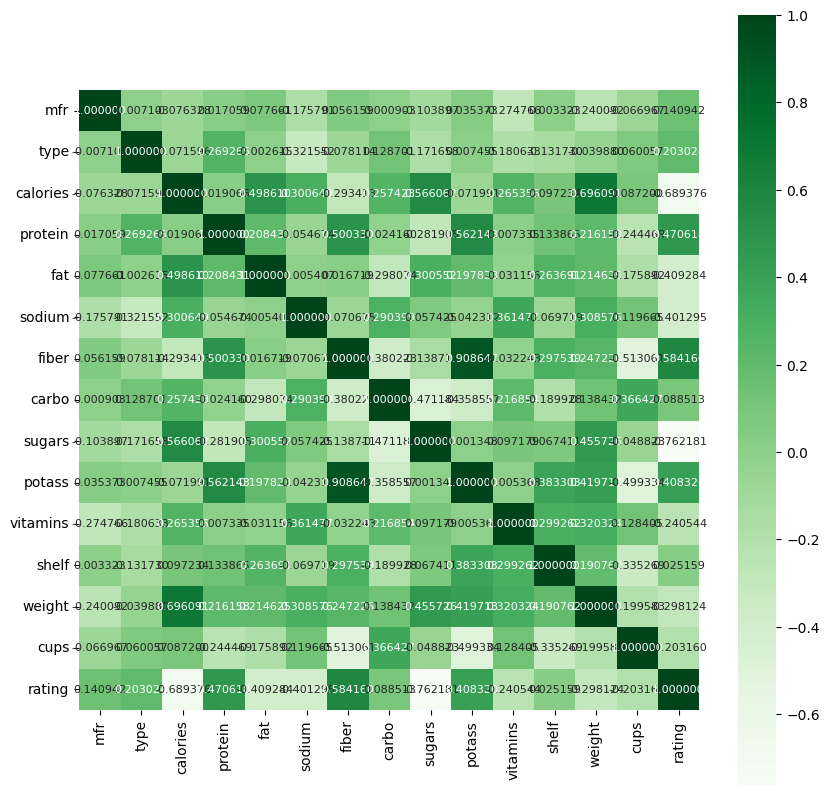

In [20]:
#converting heat map to understand the corr between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt="1f", annot=True, annot_kws={'size':8},cmap="Greens")

# Preprocessing

In [21]:
#seperate the data and label

#independent variables
X=cereal_data.iloc[:,0:14].values

#dependent variables
Y=cereal_data.iloc[:,14:15].values  

In [22]:
print(X)

[[  3.     0.    70.   ...   3.     1.     0.33]
 [  5.     0.   120.   ...   3.     1.     1.  ]
 [  2.     0.    70.   ...   3.     1.     0.33]
 ...
 [  6.     0.   100.   ...   1.     1.     0.67]
 [  1.     0.   100.   ...   1.     1.     1.  ]
 [  1.     0.   110.   ...   1.     1.     0.75]]


In [23]:
print(Y)

[[68.402973]
 [33.983679]
 [59.425505]
 [93.704912]
 [34.384843]
 [29.509541]
 [33.174094]
 [37.038562]
 [49.120253]
 [53.313813]
 [18.042851]
 [50.764999]
 [19.823573]
 [40.400208]
 [22.736446]
 [41.445019]
 [45.863324]
 [35.782791]
 [22.396513]
 [40.448772]
 [64.533816]
 [46.895644]
 [36.176196]
 [44.330856]
 [32.207582]
 [31.435973]
 [58.345141]
 [40.917047]
 [41.015492]
 [28.025765]
 [35.252444]
 [23.804043]
 [52.076897]
 [53.371007]
 [45.811716]
 [21.871292]
 [31.072217]
 [28.742414]
 [36.523683]
 [36.471512]
 [39.241114]
 [45.328074]
 [26.734515]
 [54.850917]
 [37.136863]
 [34.139765]
 [30.313351]
 [40.105965]
 [29.924285]
 [40.69232 ]
 [59.642837]
 [30.450843]
 [37.840594]
 [41.50354 ]
 [60.756112]
 [63.005645]
 [49.511874]
 [50.828392]
 [39.259197]
 [39.7034  ]
 [55.333142]
 [41.998933]
 [40.560159]
 [68.235885]
 [74.472949]
 [72.801787]
 [31.230054]
 [53.131324]
 [59.363993]
 [38.839746]
 [28.592785]
 [46.658844]
 [39.106174]
 [27.753301]
 [49.787445]
 [51.592193]
 [36.187559]

# Train & Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [26]:
print(Y.shape, Y_train.shape , Y_test.shape)

(77, 1) (61, 1) (16, 1)


# Model Training
Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [28]:
X_test.shape

(16, 14)

In [29]:
lr_pred=lr.predict(X_test)
lr_pred

array([[30.73207368],
       [49.47220168],
       [39.70712649],
       [61.42118446],
       [46.56189732],
       [58.16418089],
       [59.36451309],
       [55.03774829],
       [33.5341156 ],
       [38.79860389],
       [41.08637399],
       [55.74204005],
       [92.29197497],
       [26.74018594],
       [52.90341799],
       [36.40716637]])

In [30]:
Y_p=lr.predict([[0,0,70,4,1,130,10,5,6,280,25,3,1,0.33]])
Y_p

array([[67.55312831]])

In [31]:
from sklearn.metrics import r2_score
r2_score(Y_test,lr_pred)

0.9971066623000092